<a href="https://colab.research.google.com/github/xx2002xx/xxxx/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. Import Necessary Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr, spearmanr

# Load the dataset
data_path = "https://raw.githubusercontent.com/xx2002xx/xxxx/refs/heads/main/freedom.csv"
data = pd.read_csv(data_path)

# Display dataset overview
print("Dataset Overview:")
print(data.head())
print("\nData Information:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
       country  year  CL  PR Status  Region_Code Region_Name  is_ldc
0  Afghanistan  1995   7   7     NF          142        Asia       1
1  Afghanistan  1996   7   7     NF          142        Asia       1
2  Afghanistan  1997   7   7     NF          142        Asia       1
3  Afghanistan  1998   7   7     NF          142        Asia       1
4  Afghanistan  1999   7   7     NF          142        Asia       1

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      4979 non-null   object
 1   year         4979 non-null   int64 
 2   CL           4979 non-null   int64 
 3   PR           4979 non-null   int64 
 4   Status       4979 non-null   object
 5   Region_Code  4979 non-null   int64 
 6   Region_Name  4979 non-null   object
 7   is_ldc       4979 non-null   int64 
dtypes: int64(5), object(3)
memor

In [4]:
#2. Descriptive Statistics

# Summary statistics
summary_stats = data.describe()
print("\nSummary Statistics:")
print(summary_stats)

# Regional average civil liberties which is CL and political rights PR
region_summary = data.groupby("Region_Name")[["CL", "PR"]].mean().reset_index()
print("\nRegional Average Civil Liberties and Political Rights:")
print(region_summary)

# Average scores by country status
status_summary = data.groupby("Status")[["CL", "PR"]].mean().reset_index()
print("\nAverage Scores by Country Status:")
print(status_summary)

# Save results to CSV
region_summary.to_csv("region_summary.csv", index=False)
status_summary.to_csv("status_summary.csv", index=False)



Summary Statistics:
              year           CL           PR  Region_Code       is_ldc
count  4979.000000  4979.000000  4979.000000  4979.000000  4979.000000
mean   2007.555935     3.368548     3.410524    72.534244     0.236192
std       7.494463     1.868127     2.182737    68.642348     0.424784
min    1995.000000     1.000000     1.000000     2.000000     0.000000
25%    2001.000000     2.000000     1.000000     2.000000     0.000000
50%    2008.000000     3.000000     3.000000    19.000000     0.000000
75%    2014.000000     5.000000     6.000000   142.000000     0.000000
max    2020.000000     7.000000     7.000000   150.000000     1.000000

Regional Average Civil Liberties and Political Rights:
  Region_Name        CL        PR
0      Africa  4.370317  4.593660
1    Americas  2.498901  2.272527
2        Asia  4.748768  4.900657
3      Europe  1.803458  1.719745
4     Oceania  1.829670  1.862637

Average Scores by Country Status:
  Status        CL        PR
0      F  1.6282

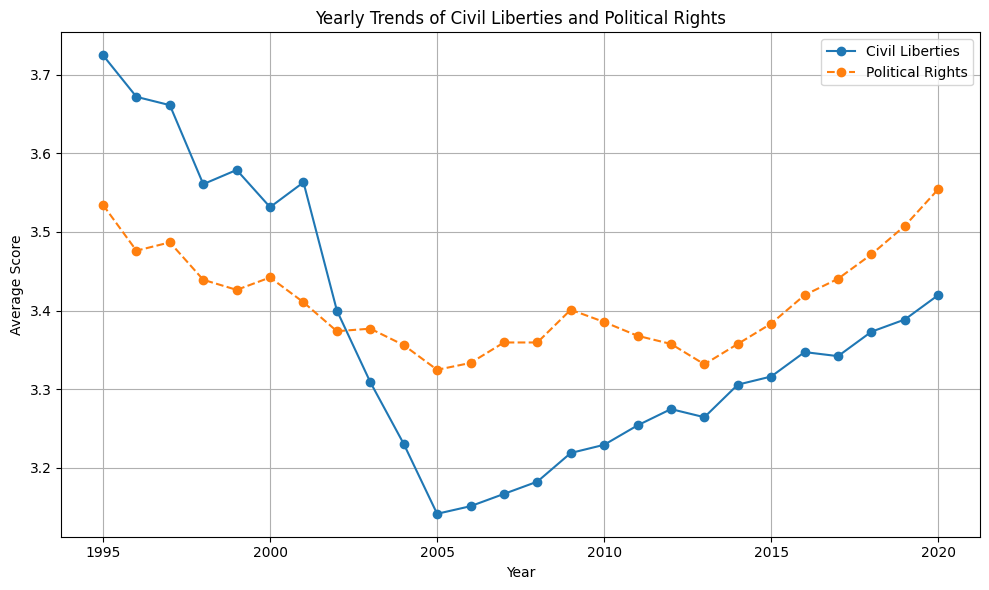

In [ ]:
# 3. Yearly Trends Analysis
# Yearly trends
yearly_trend = data.groupby("year")[["CL", "PR"]].mean().reset_index()

# Visualization: Yearly trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend["year"], yearly_trend["CL"], marker='o', label="Civil Liberties")
plt.plot(yearly_trend["year"], yearly_trend["PR"], marker='o', label="Political Rights", linestyle='--')
plt.title("Yearly Trends of Civil Liberties and Political Rights")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("yearly_trend_plot.png")
plt.show()



Country Status Distribution:
Status
F     2219
PF    1503
NF    1257
Name: count, dtype: int64


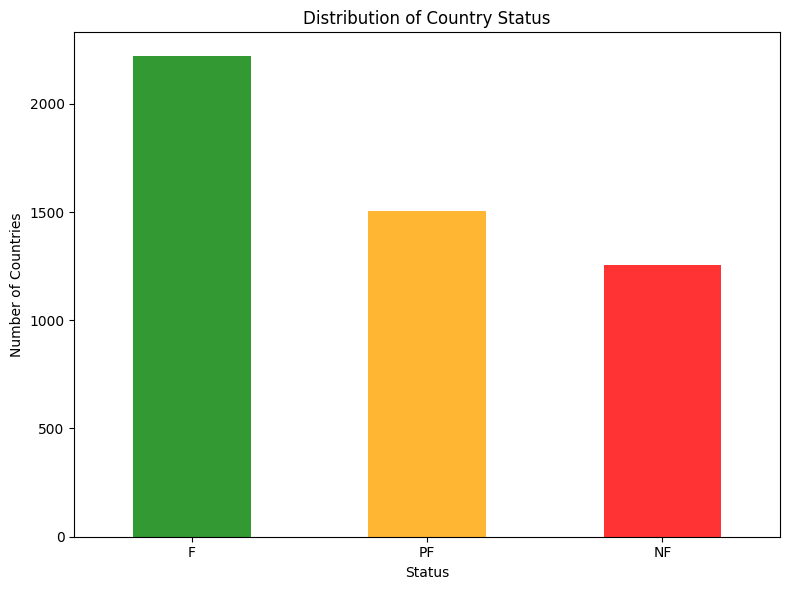

In [5]:
# 4. Country Status Distribution
# Count of countries by status
status_count = data["Status"].value_counts()
print("\nCountry Status Distribution:")
print(status_count)

# Visualization: Status distribution
plt.figure(figsize=(8, 6))
status_count.plot(kind="bar", color=["green", "orange", "red"], alpha=0.8)
plt.title("Distribution of Country Status")
plt.ylabel("Number of Countries")
plt.xlabel("Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("status_distribution_plot.png")
plt.show()



Correlation Analysis:
Pearson Correlation: 0.9355736940285726, P-Value: 0.0
Spearman Correlation: 0.9377654911481094, P-Value: 0.0


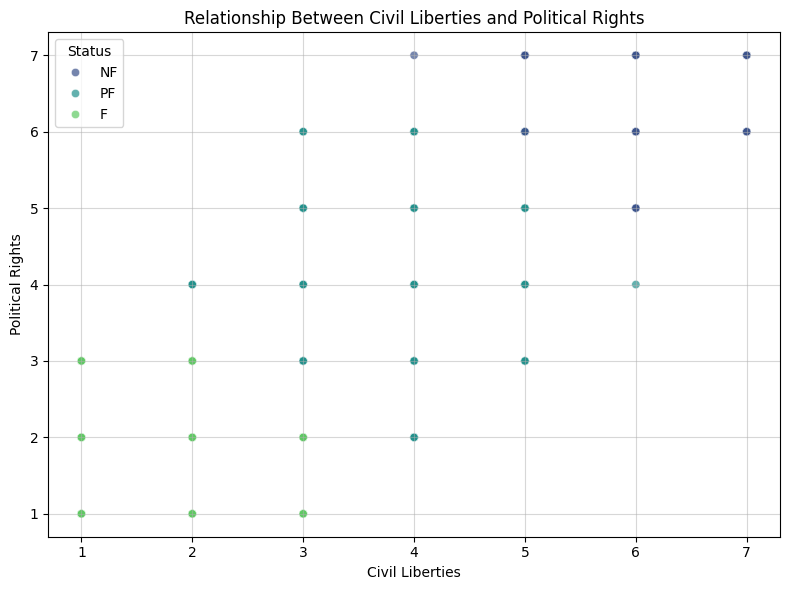

In [6]:
# 5. Relationship Between Civil Liberties and Political Rights
# Correlation analysis
pearson_corr, p_value_pearson = pearsonr(data["CL"], data["PR"])
spearman_corr, p_value_spearman = spearmanr(data["CL"], data["PR"])

print("\nCorrelation Analysis:")
print(f"Pearson Correlation: {pearson_corr}, P-Value: {p_value_pearson}")
print(f"Spearman Correlation: {spearman_corr}, P-Value: {p_value_spearman}")

# Visualization: Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="CL", y="PR", hue="Status", alpha=0.7, palette="viridis")
plt.title("Relationship Between Civil Liberties and Political Rights")
plt.xlabel("Civil Liberties")
plt.ylabel("Political Rights")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("cl_vs_pr_scatter.png")
plt.show()


In [7]:
# 6. Hypothesis Testing: Civil Liberties for LDC vs Non-LDC Countries

# Split data into LDC and non-LDC
ldc = data[data["is_ldc"] == 1]
non_ldc = data[data["is_ldc"] == 0]

# T-test
t_stat, p_value = ttest_ind(ldc["CL"], non_ldc["CL"])
print("\nT-Test for Civil Liberties (LDC vs Non-LDC):")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Save results
with open("ldc_vs_non_ldc_analysis.txt", "w") as f:
    f.write("T-Test Results for Civil Liberties (LDC vs Non-LDC):\n")
    f.write(f"T-Statistic: {t_stat}\n")
    f.write(f"P-Value: {p_value}\n")




T-Test for Civil Liberties (LDC vs Non-LDC):
T-Statistic: 24.49248959024674, P-Value: 3.5132144921778015e-125


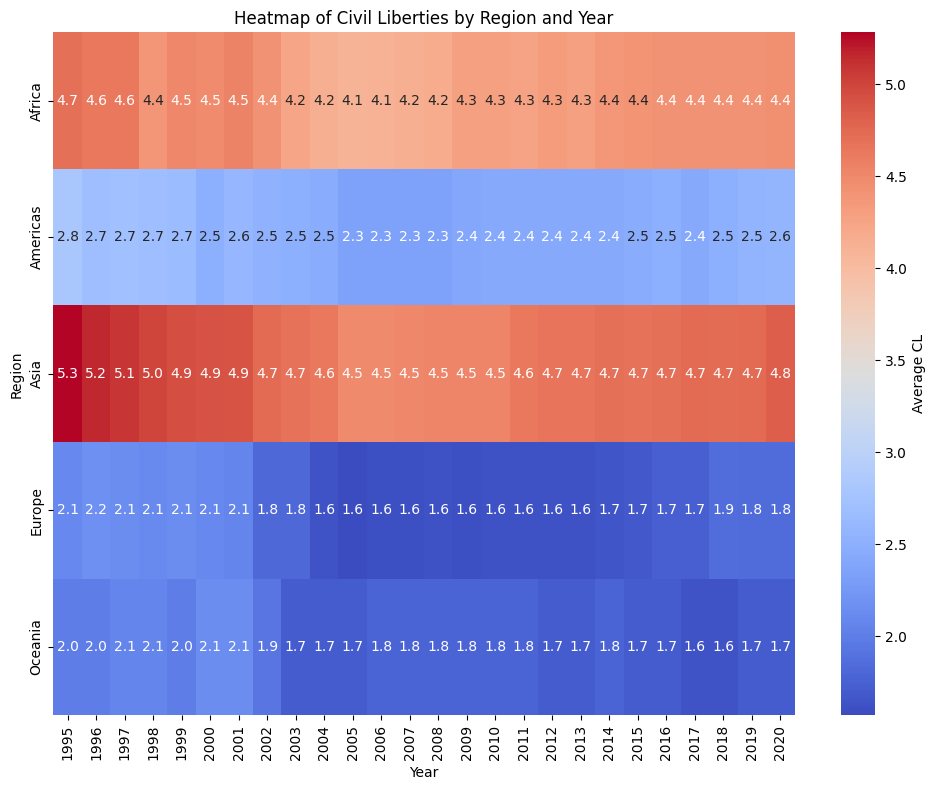

In [8]:
# 7. Hotspot Analysis: Regional Trends Over Years
# Visualization: Heatmap
plt.figure(figsize=(10, 8))
pivot_table = data.pivot_table(values="CL", index="Region_Name", columns="year", aggfunc="mean")
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".1f", cbar_kws={"label": "Average CL"})
plt.title("Heatmap of Civil Liberties by Region and Year")
plt.xlabel("Year")
plt.ylabel("Region")
plt.tight_layout()
plt.savefig("cl_heatmap.png")
plt.show()


<ipython-input-9-379001e51343>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Status", y="CL", palette="pastel")
<ipython-input-9-379001e51343>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Status", y="PR", palette="muted")


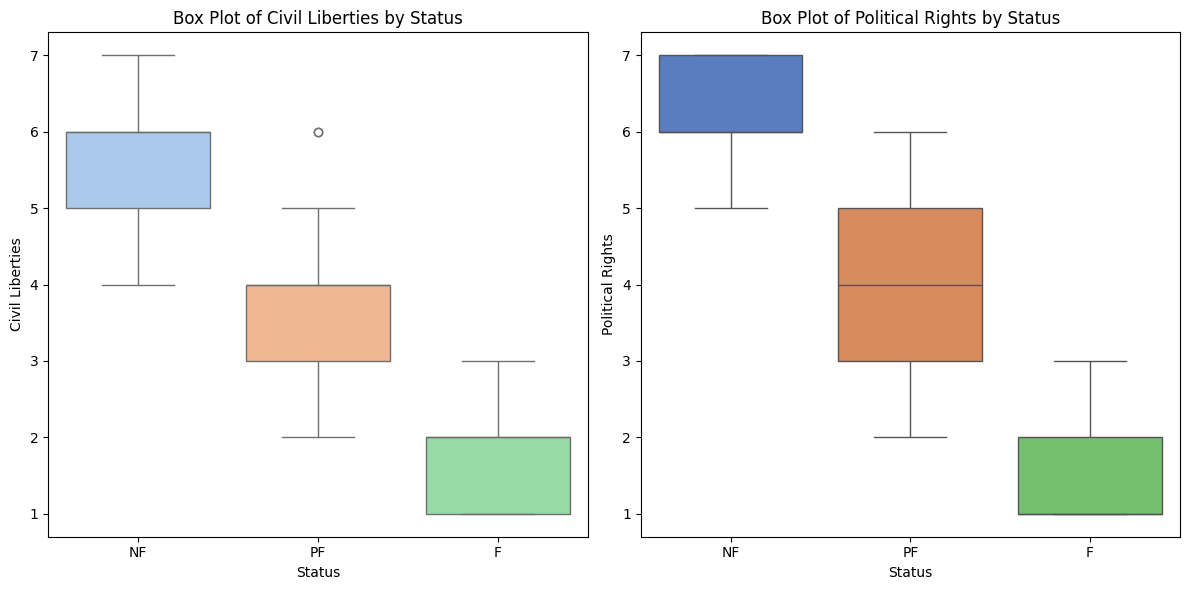

In [9]:
# 8. Box Plot for CL and PR Scores by Status
# Visualization: Box plot for Civil Liberties and Political Rights by Status
plt.figure(figsize=(12, 6))

# Box plot for Civil Liberties (CL)
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x="Status", y="CL", palette="pastel")
plt.title("Box Plot of Civil Liberties by Status")
plt.xlabel("Status")
plt.ylabel("Civil Liberties")

# Box plot for Political Rights (PR)
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x="Status", y="PR", palette="muted")
plt.title("Box Plot of Political Rights by Status")
plt.xlabel("Status")
plt.ylabel("Political Rights")

# Save and show the plots
plt.tight_layout()
plt.savefig("box_plot_status.png")
plt.show()